In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

## Challenge 1

B0 + B1*log(x) + epsilon

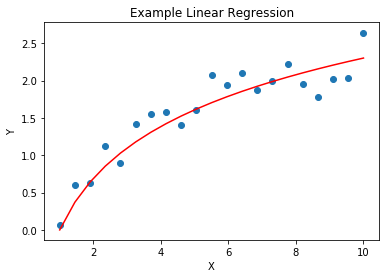

In [4]:
%matplotlib inline

raw_inputs = np.linspace(1,10,21)
x = []
y = []
for val in raw_inputs:
    x.append(val)
    y.append(np.log(val) + np.random.normal(0,0.2))
df = pd.DataFrame({'X': x, 'y':y})
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
plt.scatter(x,y)
plt.plot(raw_inputs,np.log(raw_inputs),'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example Linear Regression");

In [5]:
lr_model1 = LinearRegression()
lr_model1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
lr_model1.score(x,y)

0.7853519695552464

In [7]:
df.head()

,X,y
0,1.00,0.069433
1,1.45,0.597751
2,1.90,0.624626
3,2.35,1.126776
4,2.80,0.889983


In [8]:
df["X^2"] = df["X"]**2

In [9]:
df.head()

,X,y,X^2
0,1.00,0.069433,1.0000
1,1.45,0.597751,2.1025
2,1.90,0.624626,3.6100
3,2.35,1.126776,5.5225
4,2.80,0.889983,7.8400


In [10]:
x_test = df["X"]
y_test = df["X^2"]
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [11]:
lr_model1.score(x_test, y_test)

-1.347131239244788

## Challenge 2

B0 + B1*x + B2*x^2 + epsilon

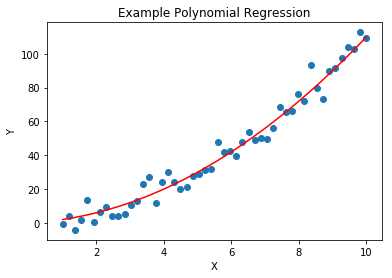

In [14]:
raw_inputs = np.linspace(1,10,50)
x = []
y = []
for val in raw_inputs:
    x.append(val)
    y.append(val + val**2 + np.random.normal(0,5))
df2 = pd.DataFrame({'X': x, 'y':y})
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,x+x**2,'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example Polynomial Regression");

In [15]:
df2.shape

(50, 2)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df2["X^2"] = df2["X"]**2

In [18]:
df2.head()

,X,y,X^2
0,1.000000,-0.642260,1.000000
1,1.183673,3.854065,1.401083
2,1.367347,-4.146115,1.869638
3,1.551020,1.964677,2.405664
4,1.734694,13.287146,3.009163


In [19]:
x = df2[["X","X^2"]]
y = df2["y"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=100)

In [21]:
lr_model3 = LinearRegression()

In [22]:
lr_model3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
lr_model3.score(X_train, y_train)

0.9747928085774693

In [24]:
lr_model3.score(X_test, y_test)

0.9722229542597463

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
y_train_pred = lr_model3.predict(X_train)

In [27]:
y_test_pred = lr_model3.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

5.2563489893015545

In [29]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

5.777900528588382

## Challenge 3

In [30]:
#x = df2[["X"
#y = df2["y"]
         
def get_polynomial_x(my_df, poly_terms):
    x_poly_list = my_df
    for i in range(0,poly_terms+1):
        x_poly_list["X"+str(i)] = (pd.Series(my_df["X"]**i))
    return x_poly_list


In [31]:
new_df = get_polynomial_x(df2,7)

In [32]:
new_df.head()

,X,y,X^2,X0,X1,X2,X3,X4,X5,X6,X7
0,1.000000,-0.642260,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.183673,3.854065,1.401083,1.0,1.183673,1.401083,1.658425,1.963033,2.323590,2.750372,3.255543
2,1.367347,-4.146115,1.869638,1.0,1.367347,1.869638,2.556443,3.495545,4.779623,6.535402,8.936163
3,1.551020,1.964677,2.405664,1.0,1.551020,2.405664,3.731234,5.787221,8.976097,13.922110,21.593477
4,1.734694,13.287146,3.009163,1.0,1.734694,3.009163,5.219976,9.055061,15.707759,27.248153,47.267205


In [35]:
def create_poly_models(my_df, model_num):
    train_scores = []
    test_scores = []
    train_error = []
    test_error = []
    for i in range(0, model_num):
        x = my_df["X" + str(i)]
        y = my_df["y"]
        x = np.array(x).reshape(-1,1)
        y = np.array(y).reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=100)
        lm = LinearRegression()
        lm.fit(X_train, y_train)
        train_scores.append(lm.score(X_train, y_train))
        test_scores.append(lm.score(X_test, y_test))
        y_train_pred = lm.predict(X_train)
        y_test_pred = lm.predict(X_test)
        train_error.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_error.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    errors_df = pd.DataFrame({"train_r^2" : train_scores, "test_r^2" : test_scores, "train_error": train_error, "test_error": test_error})
    return errors_df

In [36]:
my_errors = create_poly_models(new_df, 8)

In [37]:
my_errors.columns

Index(['test_error', 'test_r^2', 'train_error', 'train_r^2'], dtype='object')

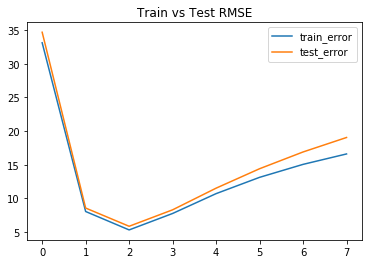

In [42]:
plt.plot(my_errors.index, my_errors["train_error"])
plt.plot(my_errors.index, my_errors["test_error"])
plt.title("Train vs Test RMSE")
plt.legend()

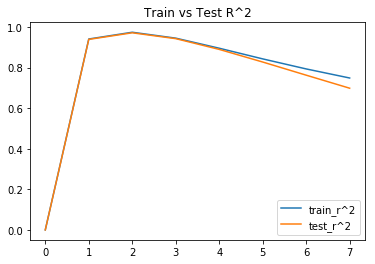

In [41]:
plt.plot(my_errors.index, my_errors["train_r^2"])
plt.plot(my_errors.index, my_errors["test_r^2"])
plt.title("Train vs Test R^2")
plt.legend()

## Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [68]:
x = df2[["X","X^2"]]
y = df2["y"]

In [45]:
x.shape

(50, 2)

In [46]:
y.shape

(50,)

In [48]:
y = np.array(y).reshape(-1,1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=100)

In [59]:
X_train.shape

(35, 2)

In [89]:
scores_train = []
scores_test = []
for i in range(5,40,5):
    X_train_curr = X_train.iloc[0:i, :]
    y_train_curr = y_train.iloc[0:i]
    lm = LinearRegression()
    lm.fit(X_train_curr,y_train_curr)
    
    y_train_pred = lm.predict(X_train_curr)
    y_test_pred = lm.predict(X_test)
    scores_train.append(np.sqrt(mean_squared_error(y_train_curr, y_train_pred)))
    scores_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    #scores_train.append()
    #scores_train.append(lm.score(X_train_curr, y_train_curr))
    #scores_test.append(lm.score(X_test, y_test))

In [90]:
scores_train

[2.8035121923952686,
 4.9449700070209,
 4.60085196143385,
 5.322212775336773,
 5.225572821865768,
 5.591622314642541,
 5.392968599218799]

In [91]:
scores_test

[7.593583406472585,
 5.598704227333435,
 5.923366175527831,
 6.662365413840889,
 6.509527543232423,
 5.76484255569214,
 5.383303427924706]

In [84]:
training_samples = range(5,40,5)

Text(0,0.5,'RMSE')

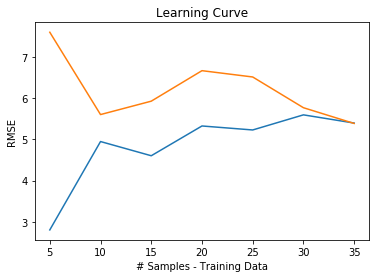

In [93]:
plt.plot(training_samples, scores_train)
plt.plot(training_samples, scores_test)
plt.title("Learning Curve")
plt.xlabel("# Samples - Training Data")
plt.ylabel("RMSE")